# Basic plotting

Plotting is not part of Python but there are a number of packages that exist to support it. Mostly we'll be using the matplotlib package. Matplotlib supports two modes. In *stateful or state-machine mode*, it maintains the current state or context which applies to the current drawing. It's easier to use in an interactive context and it's what we'll be using for starters. In *stateless (object-oriented) mode*, we manage a set of objects such as *figures* and *axes* for each drawing. Stateless mode gives us more control over our graphics and we'll look into this later in the course.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
from IPython.display import Image, display

datadir = '/content/drive/My Drive/Notebooks/Assignment1/data/'
imagesdir = '/content/drive/My Drive/Notebooks/Assignment1/images/'


def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))


We'll use the *pyplot* package in stateful mode and embed our drawing right into the notebook. See [pyplot function overview](https://matplotlib.org/api/pyplot_summary.html#the-pyplot-api) for more information.

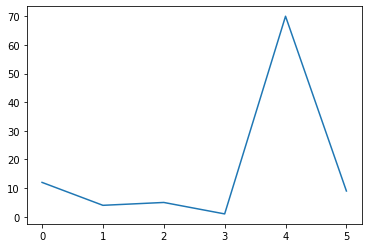

In [3]:
plt.plot([12, 4, 5, 1, 70, 9]);

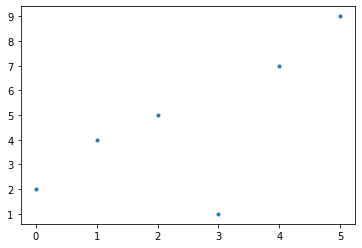

In [4]:
plt.plot([2, 4, 5, 1, 7, 9], '.');

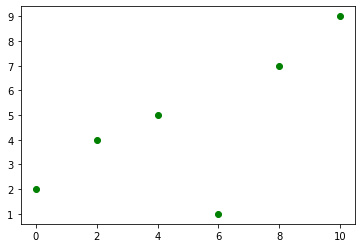

In [5]:
plt.plot(range(0, 11, 2), [2, 4, 5, 1, 7, 9], 'og');

The *IPython* kernel gives us the full functionality of IPython. In particular, we can find out about commands.

In [6]:
plt.plot?

To plot a smooth curve over a function, we want to evaluate the function at many evenly-spaced *x* values in a range of the domain. We can do this using the numpy package. A sequence of values of the same type is called an array (for example an array of integers or floats). We import numpy and call it *np* so that any function in the numpy package may be called as *np.function*.

In [7]:
import numpy as np

In [8]:
# generate 50 values spaced evenly from 0.0 to 2.0
np.linspace(0, 2, 50)

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

In [9]:
# 100 values from -4 to 4
xs = np.linspace(-4, 4, 100)
print(xs[-10:])

[3.27272727 3.35353535 3.43434343 3.51515152 3.5959596  3.67676768
 3.75757576 3.83838384 3.91919192 4.        ]


Plotting the value of polynomial $y=ax^2+bx+c$ for some coefficients $a$, $b$, and $c$.

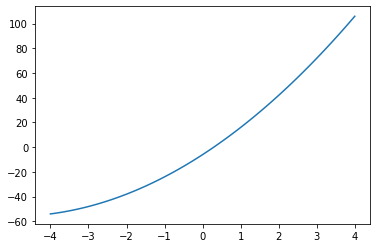

In [10]:
a = 2
b = 20
c = -6
def f(x, a, b, c):
    return a * x ** 2 + b * x + c
ys = []
for x in xs:
    ys.append(f(x, a, b, c))
plt.plot(xs, ys);

But we can do it much more cleanly than that because we can manipulate numpy arrays as single objects. Some examples.

In [11]:
a = np.array(range(8))
print(a)
print(a + 2)
print(a)
print(a * 2)
def pow(x):
    return 2 ** x
print(pow(a))

[0 1 2 3 4 5 6 7]
[2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7]
[ 0  2  4  6  8 10 12 14]
[  1   2   4   8  16  32  64 128]


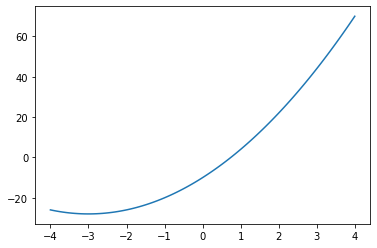

In [12]:
def make_poly(a, b, c):
    def f(x):
        return a * x ** 2 + b * x + c
    return f

f = make_poly(2, 12, -10)

plt.plot(xs, f(xs));

### Exercise 1
Plot $y=(x+2)(x-1)(x-4)$ for $x$ going from $-3$ to $+5$ using a dashed red line. On the same figure, plot a blue circle for every point where $y$ equals zero. Set the size of the markers to 10. Label the axes as 'x-axis' and 'y-axis' and title the figure 'How cool is this?'. Here's what it should look like.


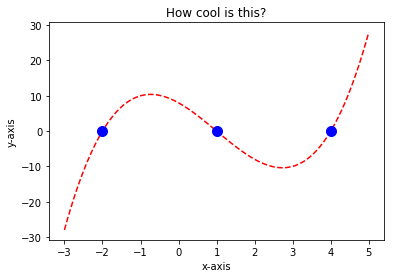

In [13]:
display_images(['M005_ex1.png'])

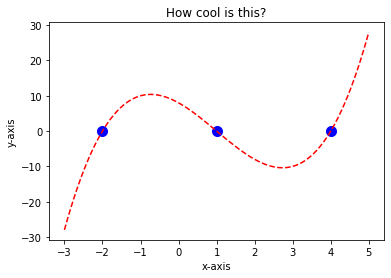

In [14]:
xpoints= np.linspace(-3,5,100)

def make_poly():
    def f(x):
        return (x+2)*(x-1)*(x-4)
    return f

f = make_poly()

plt.title("How cool is this?")
plt.xlabel('x-axis')
plt.ylabel('y-axis')

x1 = [-2,1,4]
y1 = [0,0,0]

plt.plot(x1,y1, 'ob', ms= 10)
plt.plot(xpoints, f(xpoints) ,'--r')


### Exercise 2
Write a more general function for plotting a polynomial and its roots, given a list of its roots. 

    plot_polynomial_and_roots(roots, xrange)

plots the polynomial and its roots from `xrange[0]` to `xrange[1]`. Here are two examples:

    plot_polynomial_and_roots([-2, 1, 4], xrange=(-3, 5))
    plot_polynomial_and_roots([-5, -2, 4, 12], xrange=(-7, 14))






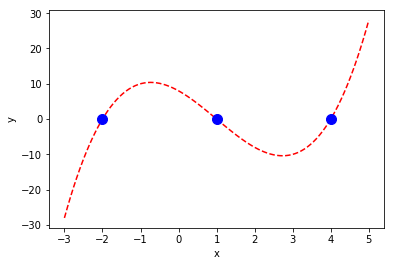

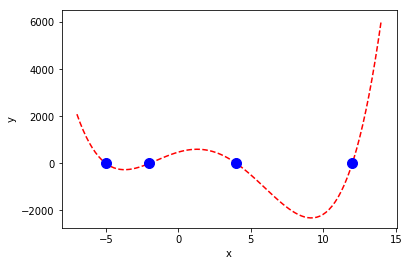

In [15]:
display_images(['M005_ex2A.png', 'M005_ex2B.png'])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

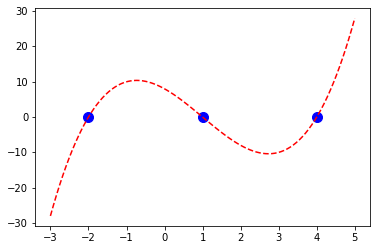

In [16]:
roots = [-2, 1, 4]
xrange = np.linspace(-3,5,100)

def plot_polynomial_and_roots(roots, xrange):
  plt.plot(roots,np.zeros(len(roots)), 'ob', ms= 10)
  def make_poly():
    def f(x):
      return (x-roots[0])*(x-roots[1])*(x-roots[2])
    return f
  f = make_poly()
  plt.plot(xrange, f(xrange), '--r');
  return plt

plot_polynomial_and_roots(roots, xrange)

We move on to another topic. You can load datafiles using numpy's `loadtxt` function. Here we are provided with the data files containing the mean monthly temperature of Holland, New York City, and Beijing. The Dutch data is stored in `holland_temperature.dat`, and the other filenames are similar. 

In [17]:
import calendar
holland = np.loadtxt(datadir + 'holland_temperature.dat')
print(holland)
for month, temp in zip(calendar.month_name[0:], holland):
    print(month, temp)

[ 3.1  3.3  6.2  9.2 13.1 15.6 17.9 17.5 14.5 10.7  6.7  3.7]
 3.1
January 3.3
February 6.2
March 9.2
April 13.1
May 15.6
June 17.9
July 17.5
August 14.5
September 10.7
October 6.7
November 3.7


You can generate multiple line graphs on the same chart through repeated calls to ```plt.plot```. Here is a very basic example.

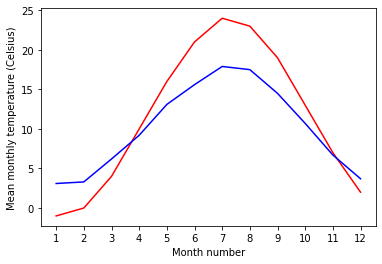

In [18]:
nyc = np.loadtxt(datadir + 'newyork_temperature.dat')
months = np.arange(1, 13)
plt.plot(months, nyc, 'r')
plt.plot(months, holland, 'b')
plt.xlabel('Month number')
plt.ylabel('Mean monthly temperature (Celsius)')
plt.xticks(np.linspace(1, 12, 12));

### Exercise 3
Write code to produce the following graph. For the *x* tick marks, look into the methods provided by ```calendar``` as well as the ```rotation``` keyword argument of ```plt.xticks```.

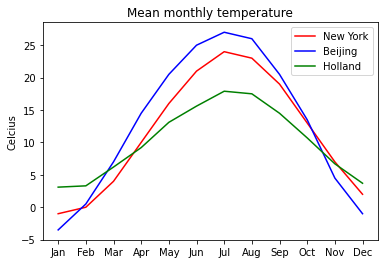

In [19]:
display_images(['M005_ex3.png'])

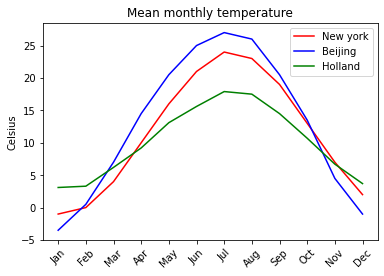

In [20]:
bj = np.loadtxt(datadir + 'beijing_temperature.dat')
y = calendar.month_name[1:]
month= list()
months = np.arange(1, 13)

for i in y:
  month.append(i[:3])

plt.plot(months, nyc, 'r')
plt.plot(months, bj, 'b')
plt.plot(months, holland, 'g')
plt.title("Mean monthly temperature")
plt.ylabel('Celsius')
plt.xticks(months, month, rotation='45')
plt.legend(["New york", "Beijing", "Holland"])

### Exercise 4
We can use ```plt.subplot``` to create a grid layout for the subplots that make up a figure:

```
plt.subplot(nrows, ncols, index, **kwargs)
```

The first two arguments indicate the number of rows and columns. The ```index``` argument indicates the subplot (or axes) that is active. For example, ```plt.subplot(2, 1, 1)``` creates a 2 &times; 1 grid where the top subplot is active. Call ```plt.subplot(2, 1, 2)``` to activate the lower subplot. 

Make a 2 &times; 1 grid where the top subplot shows Holland's mean air and sea temperature by month, and the bottom subplot shows the temperature differences by month. The two subplots share the same *x* axis and tick labels.

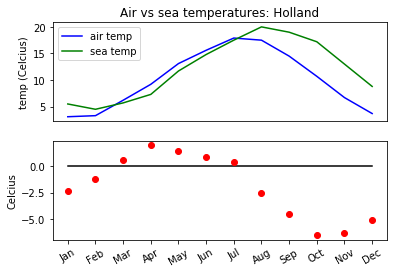

In [21]:
display_images(['M005_ex4.png'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


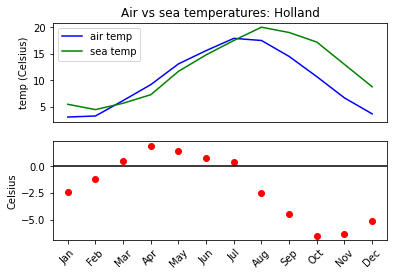

In [22]:
sea = np.loadtxt(datadir + 'holland_seawater.dat')

y = calendar.month_name[1:]
month= list()
months = np.arange(1, 13)
for i in y:
  month.append(i[:3])

plt.subplot(2, 1, 1)
plt.title("Air vs sea temperatures: Holland")
plt.plot(months, holland, 'b')
plt.plot(months, sea,'g')
plt.xticks([], [])
plt.ylabel("temp (Celsius)")

x = holland - sea

plt.subplot(2, 1, 2)
plt.plot(months, x, 'or' )
plt.axhline(y=0, color='black', linestyle='-')
plt.xticks(months, month, rotation='45')
plt.ylabel("Celsius")

plt.subplot(2, 1, 1)
plt.legend(["air temp", "sea temp"])

### Exercise 5
The following ```graph_function``` gets called with a function that maps from the domain $[x1,x2]$ to the reals and plots it.

In [23]:
def graph_function(f, x1, x2, precision):
    xs = np.linspace(x1, x2, precision)
    ys = np.vectorize(f)(xs) 
    plt.plot(xs, ys, "b")

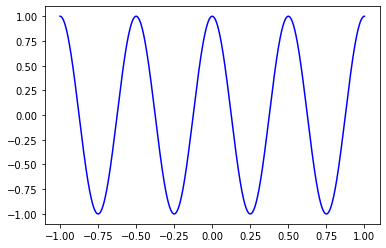

In [24]:
def f(x):
    return math.cos((4)*np.pi *x)

graph_function(f, -1, 1, 3000)

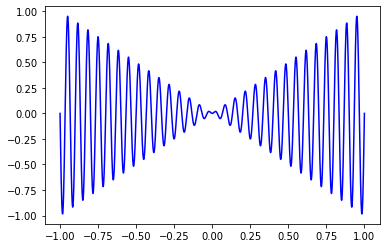

In [25]:
def g(x):
  return x*math.sin(math.pi * x*30)

graph_function(g, -1, 1, 3000)

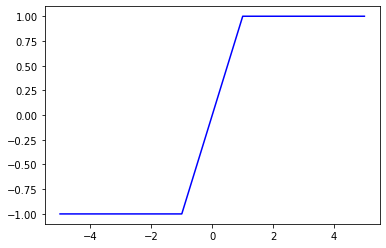

In [26]:
def q(x):
  return np.piecewise(x, [(x<1), (x>=-1)&(x<=1), x>1], [lambda x: -1, lambda x: x,lambda x: 1])

graph_function(q, -5, 5,3000)

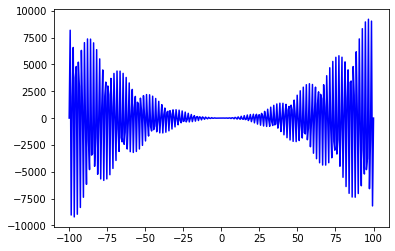

In [27]:
def p(x):
  return math.sin(math.pi*x*10)*x**2

graph_function(p, -100, 100, 300)

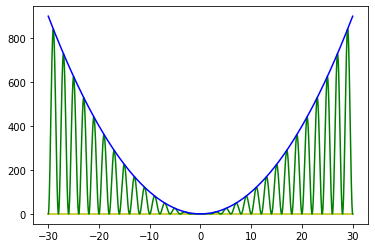

In [28]:
def h(x):
  return (x)**2

x = np.linspace(-30, 30, 32)
y= np.zeros(32)
plt.plot(x, y, "y")

def j(x):
  return -((math.cos(math.pi*x)-1)*x**2)/2

def graph_function2(f, x1, x2, precision):
    xs = np.linspace(x1, x2, precision)
    ys = np.vectorize(f)(xs) 
    plt.plot(xs, ys, "g")

graph_function2(j, -30, 30, 3000)
graph_function(h, -30, 30, 3000)

For each of the following images, write a function and call ```graph_function``` on your function to produce the image. I used three calls to ```graph_function``` to produce the last image.

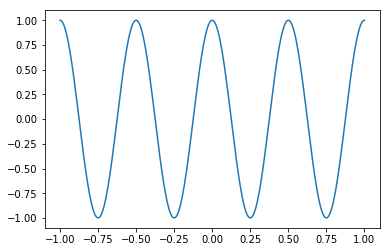

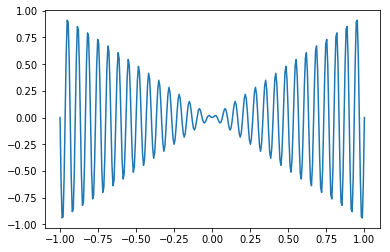

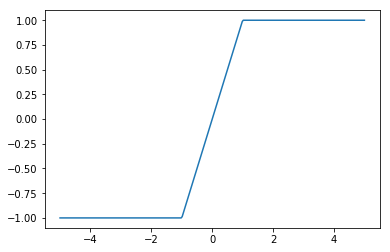

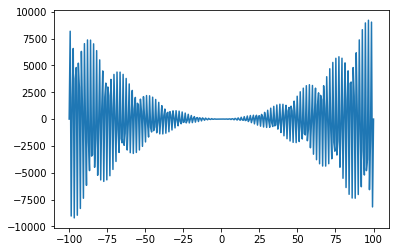

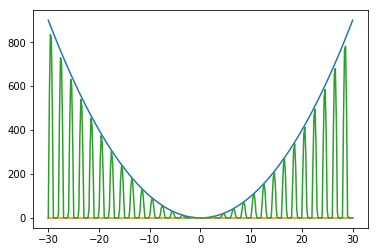

In [29]:
files = ['M005_ass1_f' + str(i) + '.png' for i in range(1,6)]
display_images(files)

### Exercise 6
Write a function ```plot_many_points(n, x0, y0, r)``` that generates *n* random points in the square $[0,0]\times [100,100]$. Your function should plot all *n* points such that those that are no more than distance *r* from the point *(x0, y0)* are colored red and the remaining points are green. Also plot the point *(x0,y0)* in black. For example:

```plot_many_points(800, 60, 40, 20)```

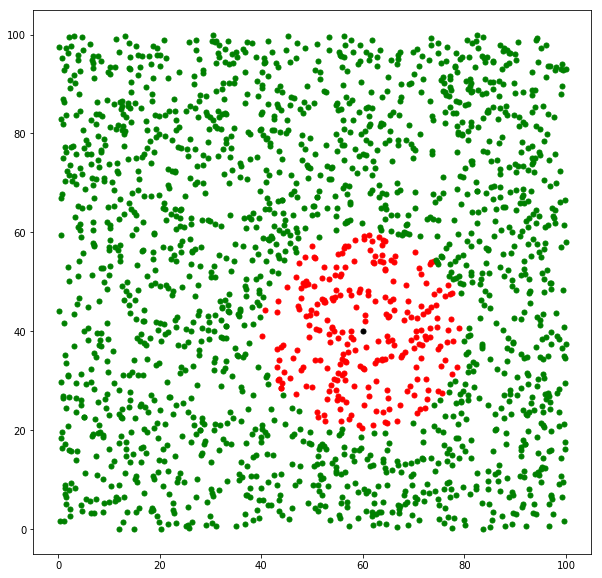

In [30]:
display_images(['plotManyPointsB.png'])

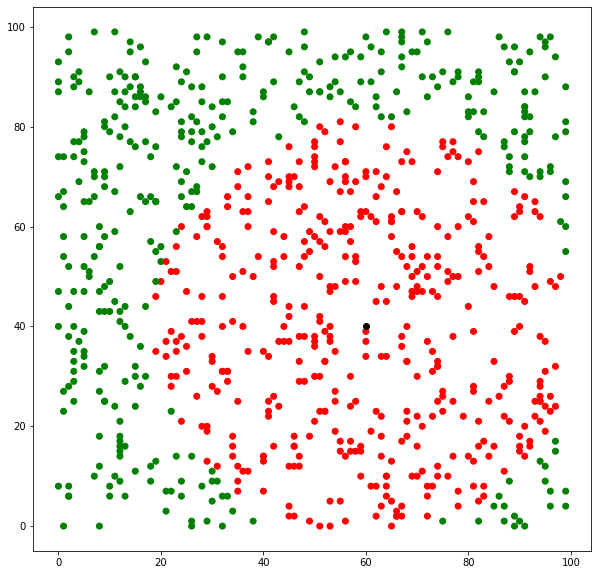

In [42]:
from matplotlib import colors
plt.figure(figsize=(10,10)) 

def plot_many_points(num, x0,y0,r):
  def dist(x,y):
    return np.sqrt((x-x0)**2+((y-y0)**2))

  xs = np.random.randint(100, size=(num))
  ys = np.random.randint(100, size=(num))
  color = dist(xs, ys)
  cmap = colors.ListedColormap(['red', 'green'])

  plt.scatter(xs, ys, c=color, cmap=cmap)
  plt.scatter(x0,y0, c= 'black')

plot_many_points(800, 60, 40, 20)